In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_excel("premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [7]:
df.dropna(inplace=True)

### Handle NA Values

In [8]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [11]:
df[df["number_of_dependants"] < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [12]:
df['number_of_dependants'].unique()

array([ 0,  2,  3,  4,  1,  5, -3, -1])

In [13]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [14]:
numeric_columns = df.select_dtypes(['float64','int64']).columns

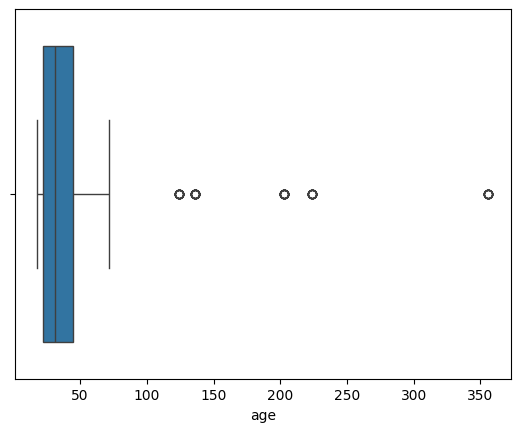

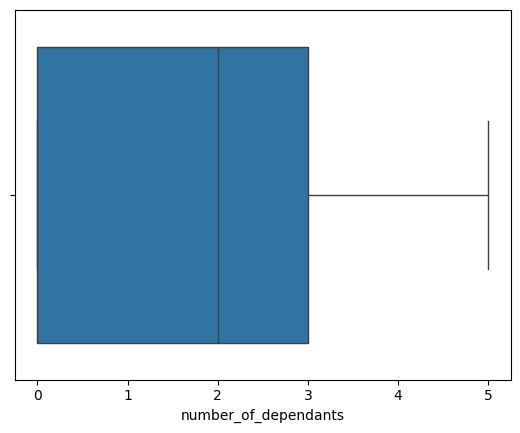

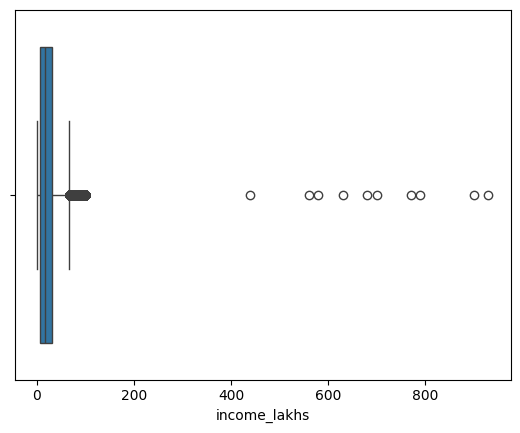

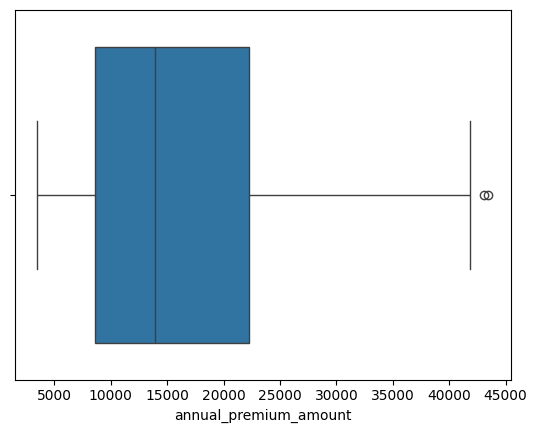

In [15]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
df[df["age"] > 100]["age"].unique()

array([224, 124, 136, 203, 356])

In [17]:
df1 = df[df["age"] < 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

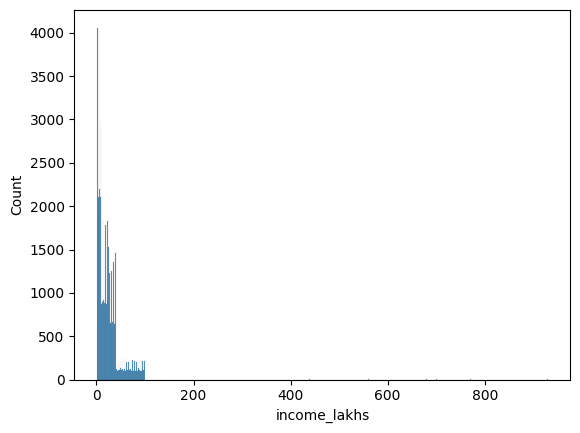

In [18]:
sns.histplot(df1["income_lakhs"])

In [19]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound, upper_bound

In [20]:
get_iqr_bounds(df1["income_lakhs"])

(-29.0, 67.0)

In [21]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [22]:
df1[df1["income_lakhs"] > quantile_threshold].shape

(10, 13)

In [23]:
df2 = df1[df["income_lakhs"] < quantile_threshold]
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49808.000000,49808.000000,49808.000000,49808.000000
mean,34.399333,1.717214,22.735083,15756.332276
std,13.683206,1.492056,21.921788,8417.581174
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8602.000000
50%,31.000000,2.000000,16.000000,13919.000000
75%,45.000000,3.000000,31.000000,22263.250000
max,72.000000,5.000000,99.000000,43471.000000


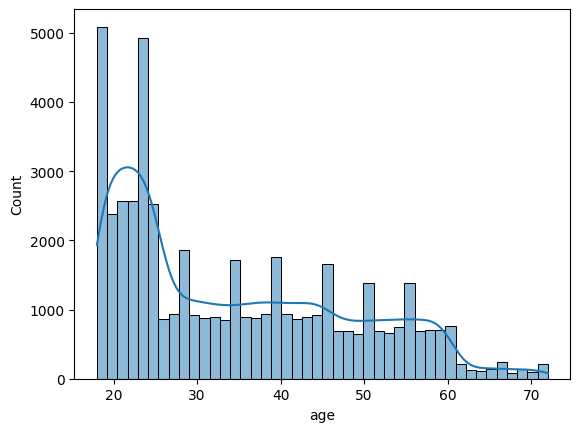

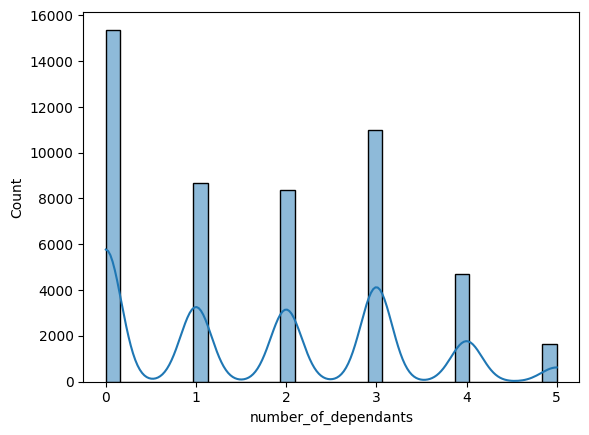

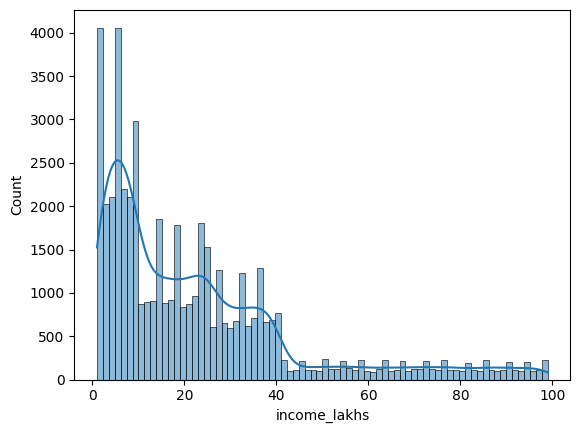

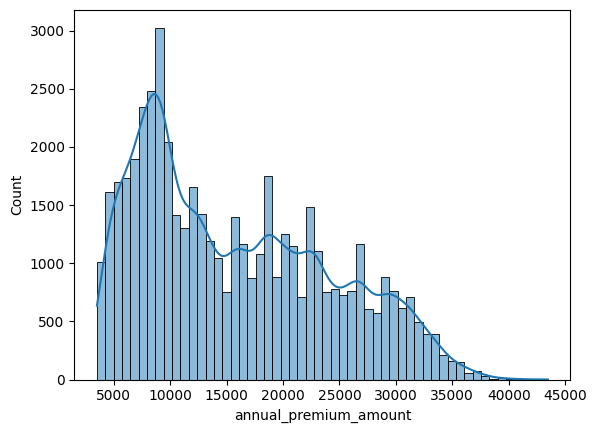

In [24]:
for col in numeric_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

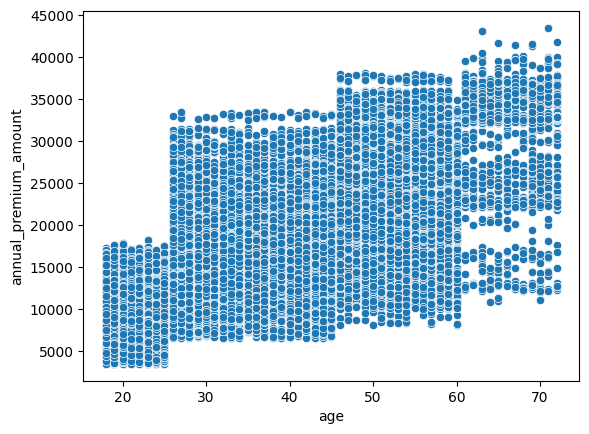

In [25]:
sns.scatterplot(df2,x="age",y="annual_premium_amount")

In [26]:
categorical_columns = df2.columns.difference(numeric_columns)

In [27]:
for col in categorical_columns:
    print(col, ":" , df2[col].unique())

bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
gender : ['Male' 'Female']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
insurance_plan : ['Bronze' 'Silver' 'Gold']
marital_status : ['Unmarried' 'Married']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']


In [28]:
df2["smoking_status"].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
}, inplace=True)
df2["smoking_status"].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [29]:
pct_count = df2["gender"].value_counts(normalize=True)

<Axes: xlabel='gender'>

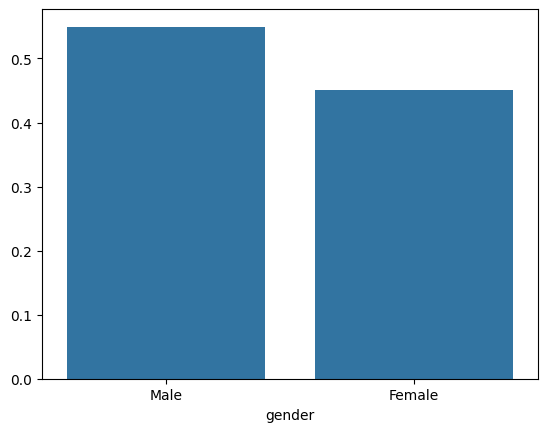

In [30]:
sns.barplot(x = pct_count.index,y = pct_count.values)

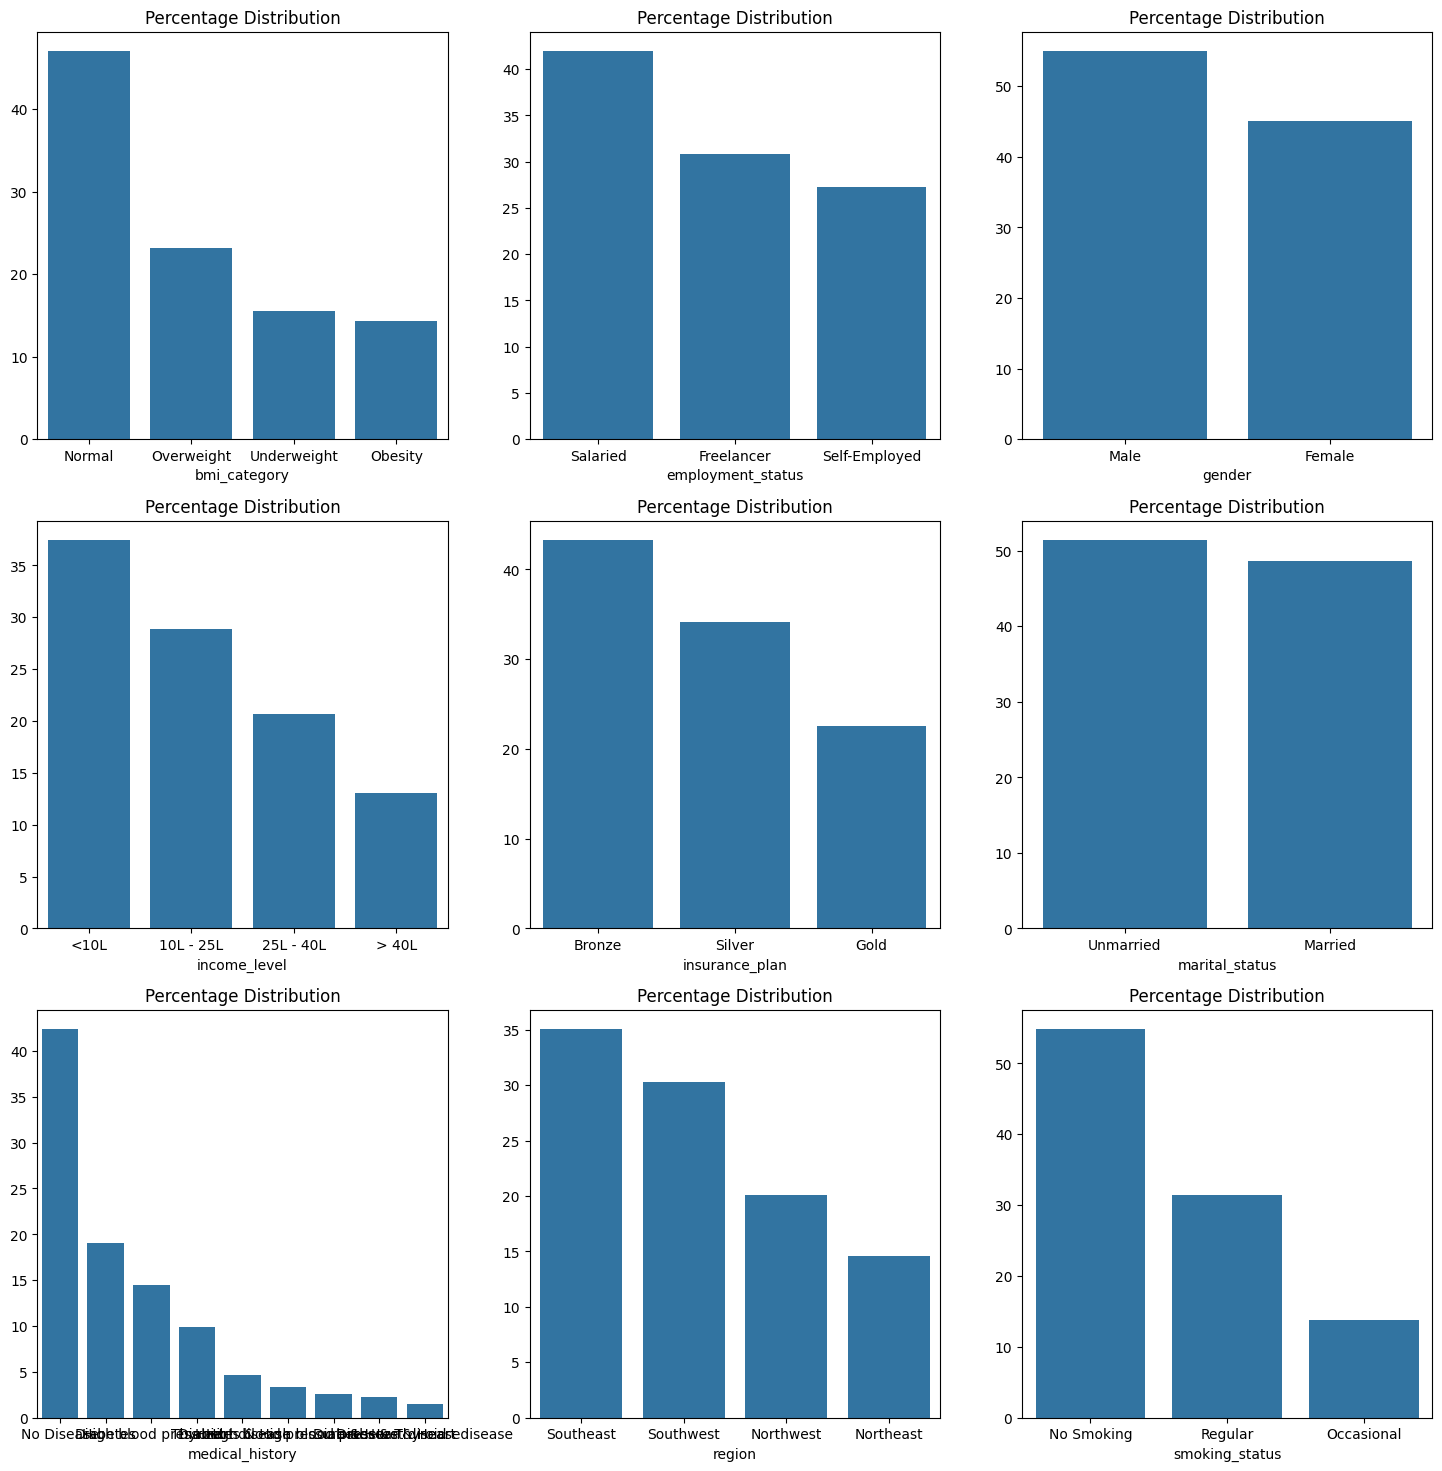

In [31]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.flatten()

for axes, col in zip(axes,categorical_columns):
     pct_count = df2[col].value_counts(normalize=True) * 100
     sns.barplot(x = pct_count.index,y = pct_count.values,ax=axes)
     axes.set_title("Percentage Distribution")
plt.show()

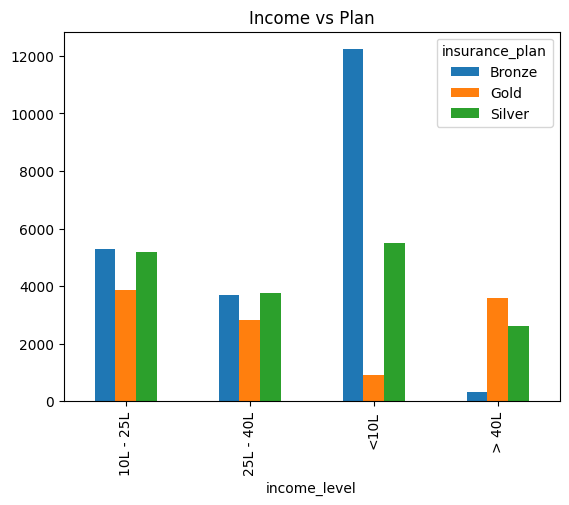

In [32]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
crosstab.plot(kind="bar")
plt.title("Income vs Plan")
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

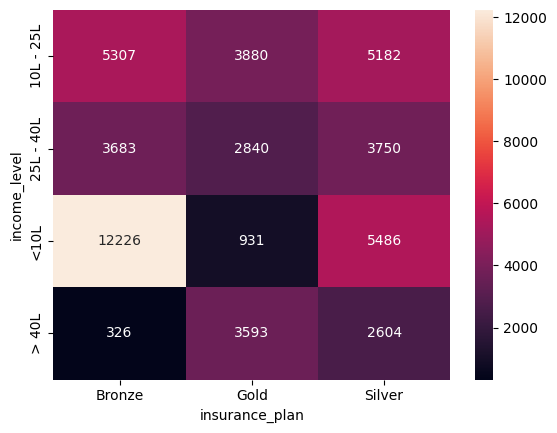

In [33]:
sns.heatmap(crosstab,annot=True,fmt='d')

In [34]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [35]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}
df2[['disease1','disease2']] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x: x.str.lower())

In [36]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,no disease,None
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,thyroid,None
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,no disease,None
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490,no disease,None


In [37]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [38]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [39]:
df2["insurance_plan"] = df2["insurance_plan"].map({
    "Bronze":1,
    "Silver":2,
    "Gold":3
})

df2["income_level"] = df2["income_level"].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [40]:
nominal_columns = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2, columns=nominal_columns,drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [41]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


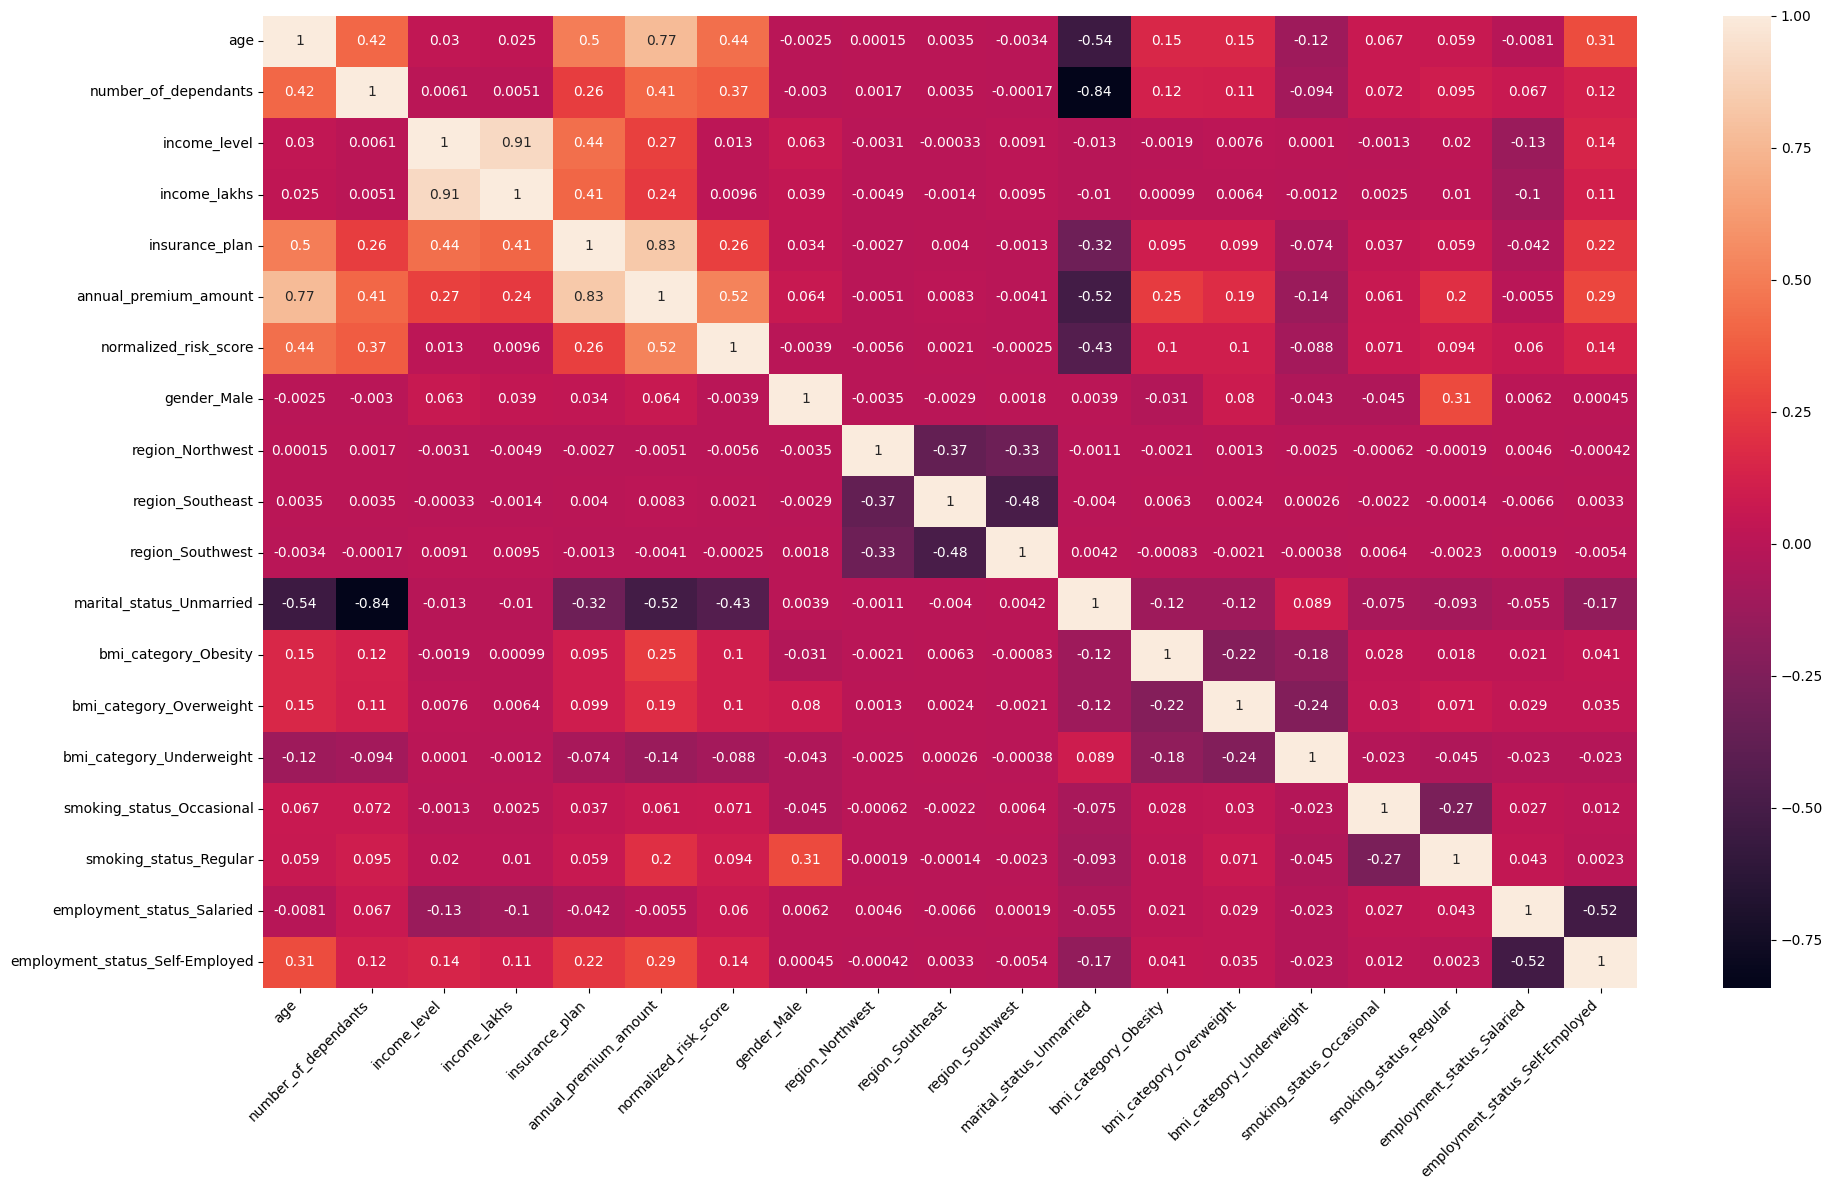

In [42]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.111111,0.0,0.666667,0.346939,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
49996,0.537037,0.4,1.000000,0.826531,1.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
49997,0.055556,0.0,0.666667,0.316327,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,0
49998,0.000000,0.4,0.333333,0.193878,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [45]:
calculate_vif(X)

,Column,VIF
0,age,4.568203
1,number_of_dependants,4.533619
2,income_level,12.609918
3,income_lakhs,11.390919
4,insurance_plan,3.574805
5,normalized_risk_score,2.686553
6,gender_Male,2.420908
7,region_Northwest,2.101878
8,region_Southeast,2.921178
9,region_Southwest,2.669438


In [46]:
calculate_vif(X.drop("income_level",axis="columns"))

,Column,VIF
0,age,4.546399
1,number_of_dependants,4.526213
2,income_lakhs,2.487302
3,insurance_plan,3.438176
4,normalized_risk_score,2.686293
5,gender_Male,2.409383
6,region_Northwest,2.100181
7,region_Southeast,2.918617
8,region_Southwest,2.667140
9,marital_status_Unmarried,3.396399


In [47]:
X_reduced = X.drop("income_level",axis="columns")

### Model Training

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

In [49]:
model_liner = LinearRegression()
model_liner.fit(x_train,y_train)
model_liner.score(x_test,y_test)

0.9277068802881224

In [50]:
y_pred = model_liner.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  5134563.441258953  RMSE:  2265.9575109120983


In [51]:
model_liner.coef_, model_liner.intercept_

(array([11320.84480976,  -598.60654635,  -387.23104353, 12445.21223389,
         4830.35511008,   141.16467047,   -19.93312597,    72.90102336,
           18.96701435,  -880.43219853,  3363.77237148,  1616.18488467,
          359.97028802,   679.17891348,  2239.27098107,   165.26365654,
          414.73816833]),
 np.float64(4721.2842279234865))

In [52]:
feature_importances = model_liner.coef_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])

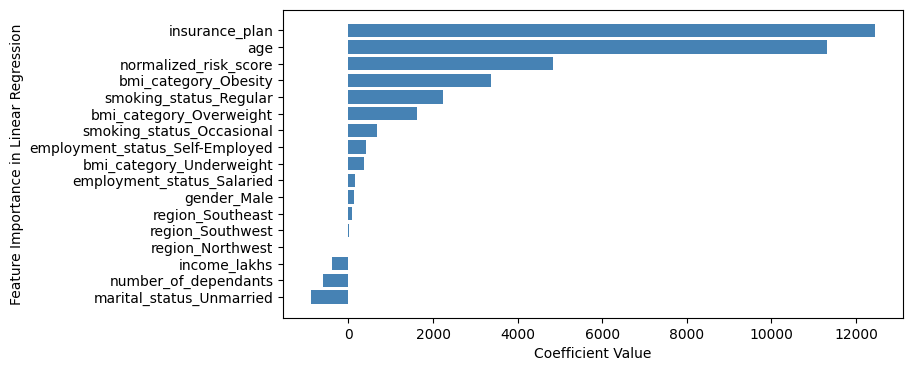

In [53]:
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

In [54]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(x_train,y_train)
model_ridge.score(x_test,y_test)

0.9277055168457802

In [56]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9812403321266174

In [57]:
y_pred = model_xgb.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  1332390.125  RMSE:  1154.2920449349028


In [58]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_score_

np.float64(0.9809418519337972)

In [59]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [60]:
best_model = random_search.best_estimator_

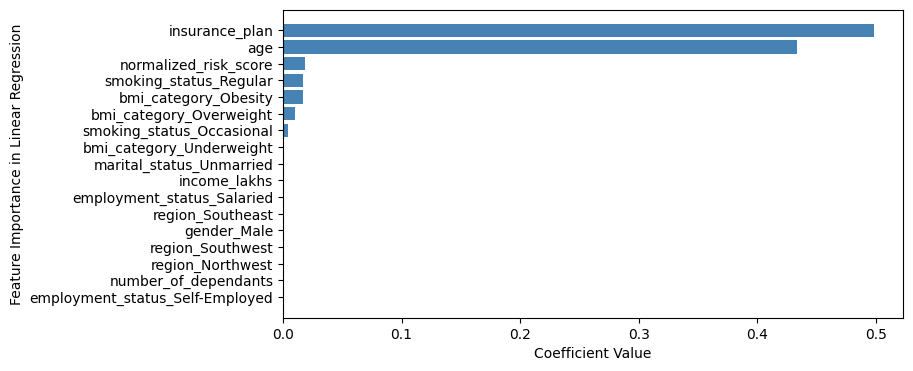

In [61]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

### Error Analysis 

In [62]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'percentage': residuals_pct
})
results_df.head()

,actual,predicted,diff,percentage
34025,6539,6582.131836,43.131836,0.659609
29504,11853,14702.767578,2849.767578,24.042585
12892,31155,30673.974609,-481.025391,-1.543975
34662,4395,6674.643555,2279.643555,51.869023
25334,19986,19694.580078,-291.419922,-1.458120


<Axes: xlabel='percentage', ylabel='Count'>

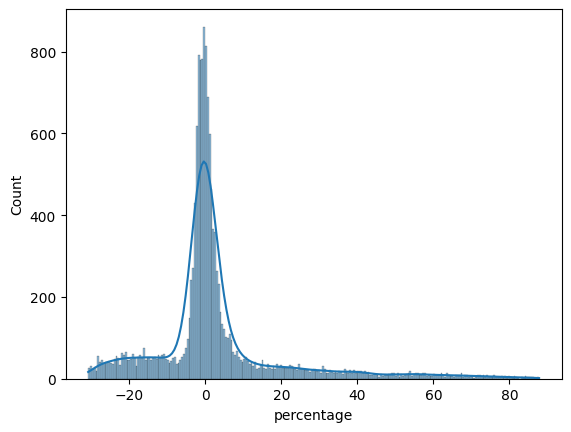

In [63]:
sns.histplot(results_df['percentage'],kde=True)

In [64]:
extreme_error_threshold = 10 
extreme_results_df = results_df[np.abs(results_df["percentage"]) > extreme_error_threshold]

In [65]:
extreme_results_df.shape

(4460, 4)

In [66]:
extreme_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_pct

29.846750987084253

In [67]:
results_df[np.abs(results_df["percentage"]) > 50].sort_values('percentage',ascending=False)

,actual,predicted,diff,percentage
624,3505,6582.131836,3077.131836,87.792634
7461,3503,6573.801758,3070.801758,87.662054
49360,3512,6581.906738,3069.906738,87.411923
10288,3517,6590.236816,3073.236816,87.382338
1692,3522,6590.236816,3068.236816,87.116321
...,...,...,...,...
27900,4739,7118.727051,2379.727051,50.215806
33079,4591,6894.110840,2303.110840,50.165777
17787,4987,7487.787109,2500.787109,50.146122
44112,4461,6696.688477,2235.688477,50.116307


In [68]:
extreme_errors_df = x_test.loc[extreme_results_df.index]

In [69]:
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
29504,0.092593,0.6,0.040816,1.0,0.428571,0,0,0,1,0,0,0,0,0,0,1,0
34662,0.000000,0.6,0.102041,0.0,0.000000,1,0,0,1,0,0,0,1,0,0,0,0
7446,0.037037,0.0,0.336735,0.0,0.000000,1,1,0,0,1,0,0,1,0,1,0,0
33557,0.129630,0.0,0.367347,0.0,0.000000,1,0,0,1,1,0,0,1,1,0,0,0
15549,0.092593,0.0,0.632653,0.5,0.000000,1,0,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40017,0.074074,0.0,0.255102,0.0,0.000000,1,0,0,0,1,0,0,1,1,0,0,0
49612,0.111111,0.2,0.071429,0.0,0.428571,0,1,0,0,1,1,0,0,0,0,1,0
7088,0.018519,0.0,0.346939,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,1,0
5643,0.129630,0.2,0.010204,1.0,0.000000,1,0,0,0,1,0,0,0,0,1,0,0


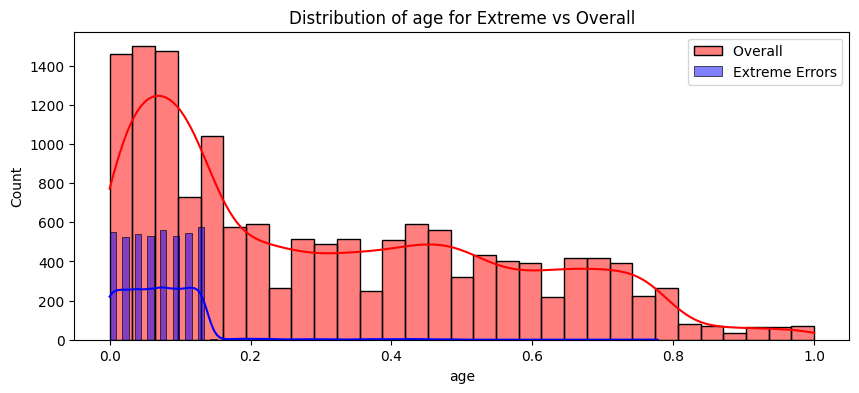

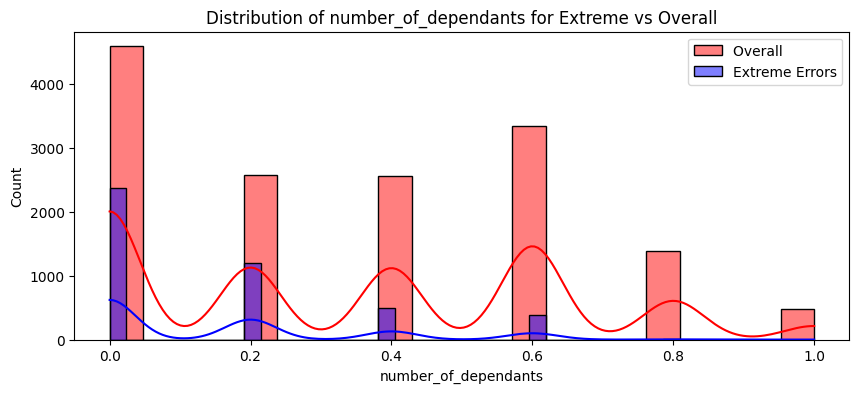

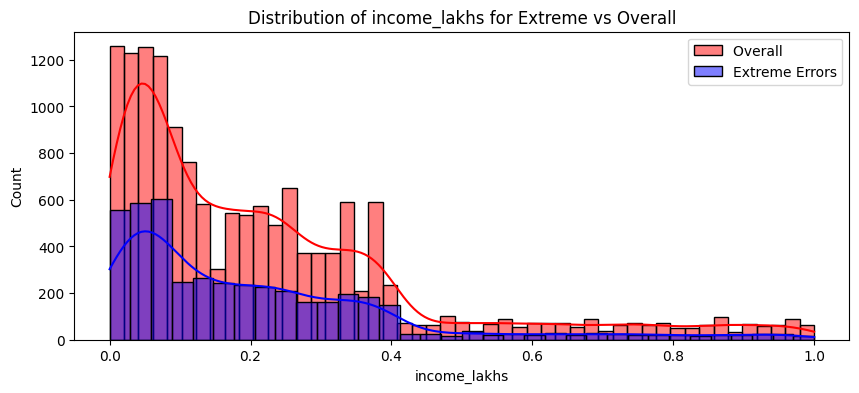

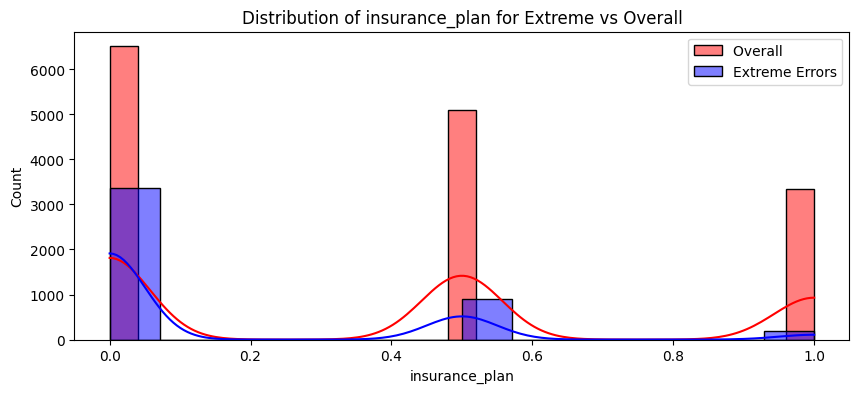

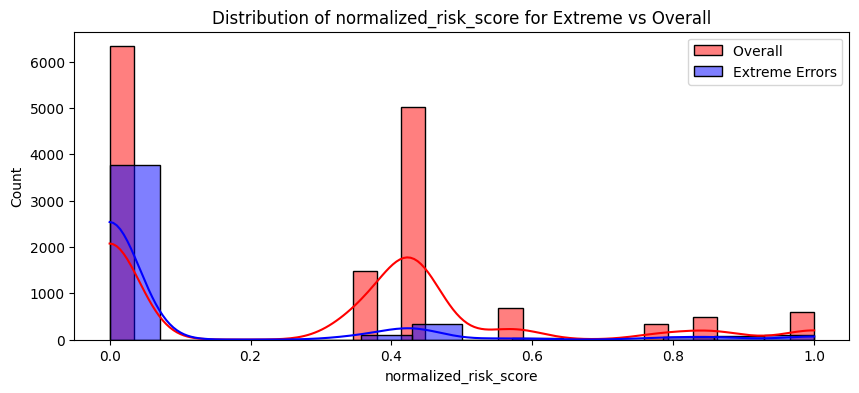

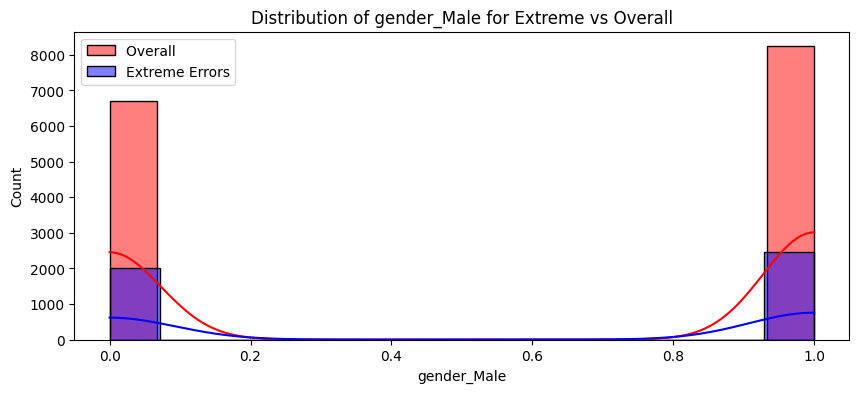

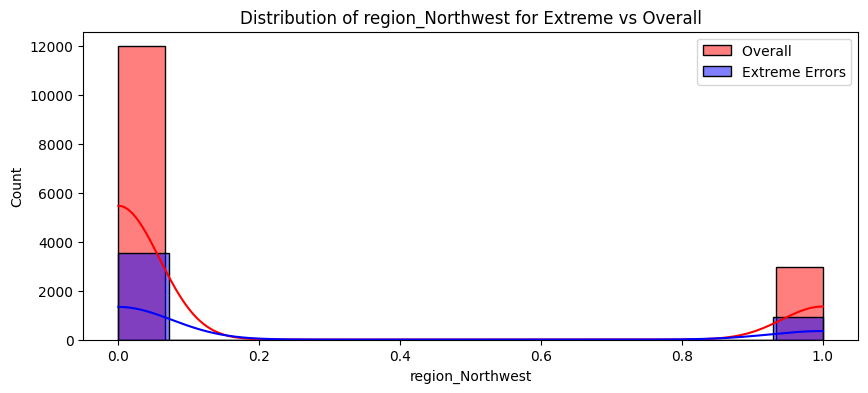

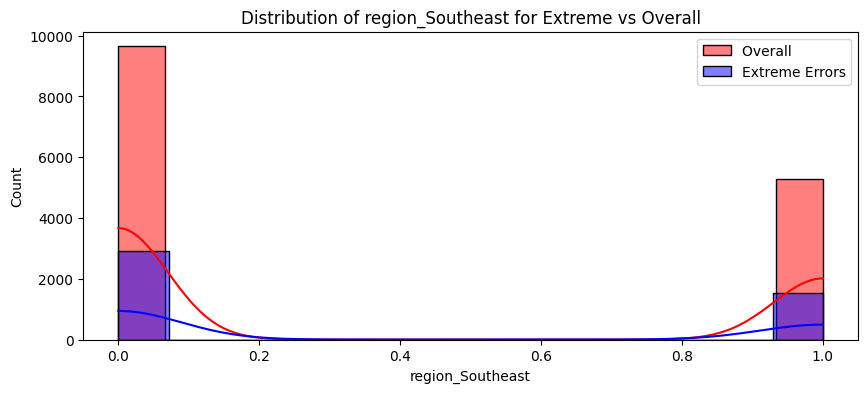

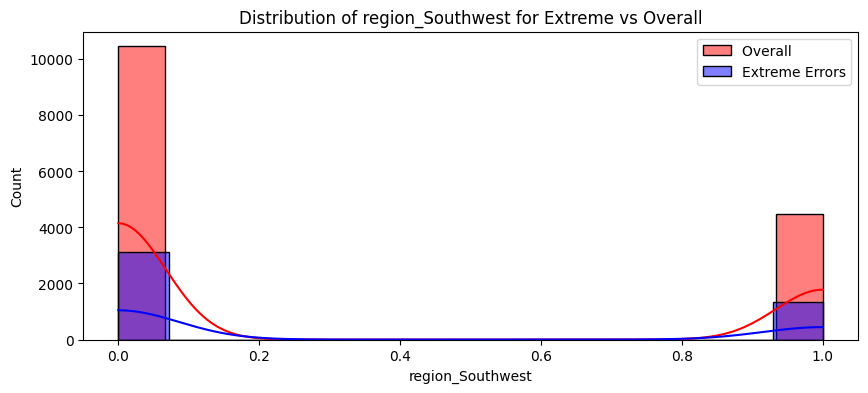

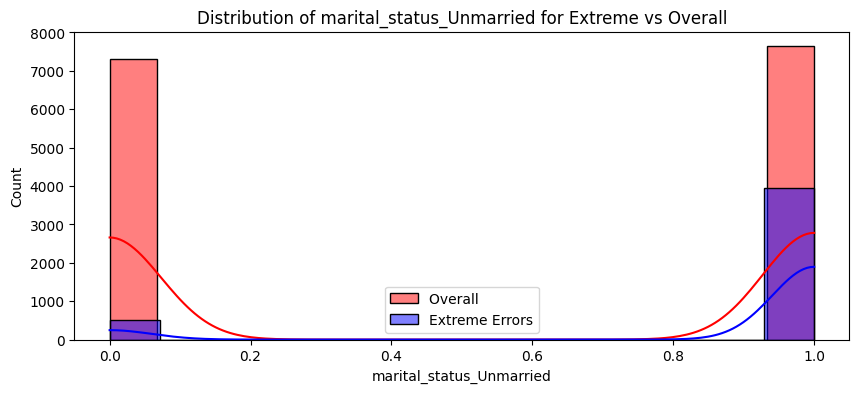

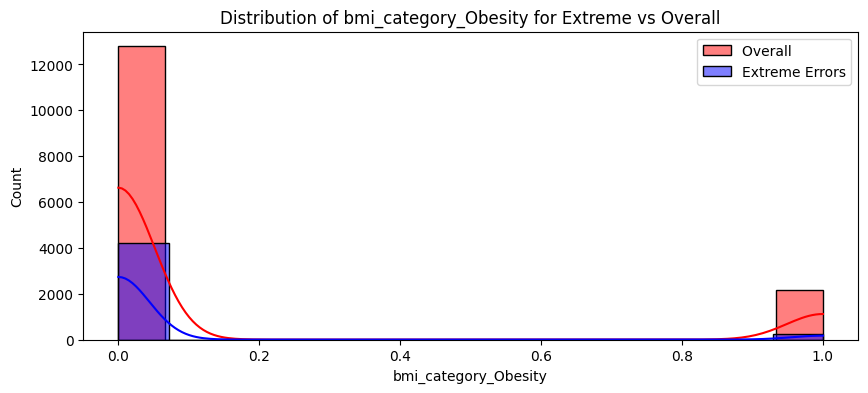

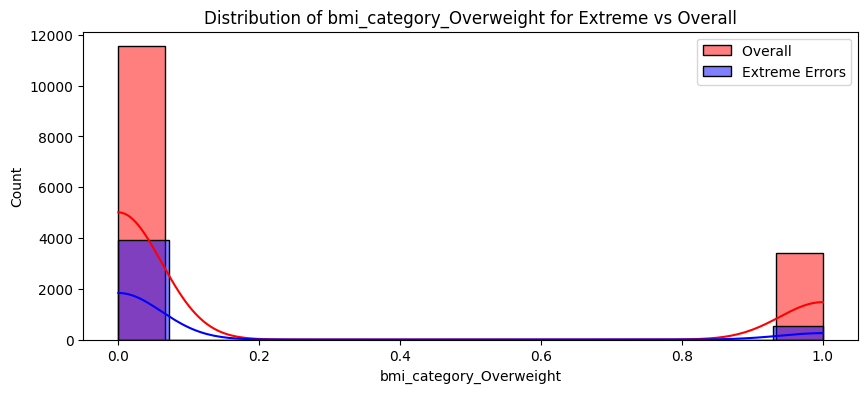

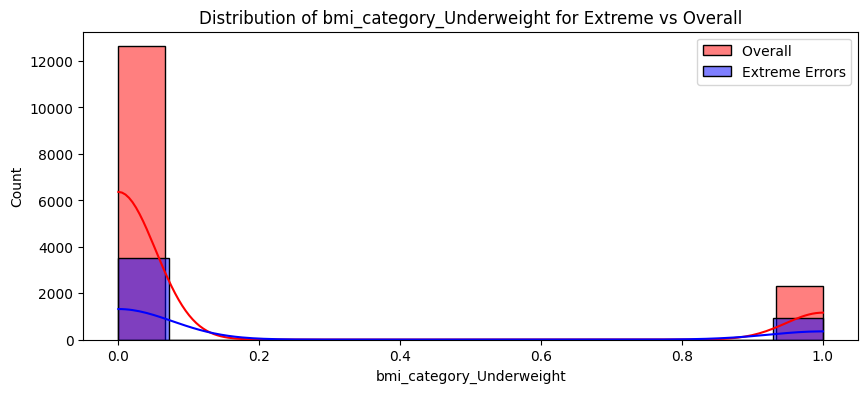

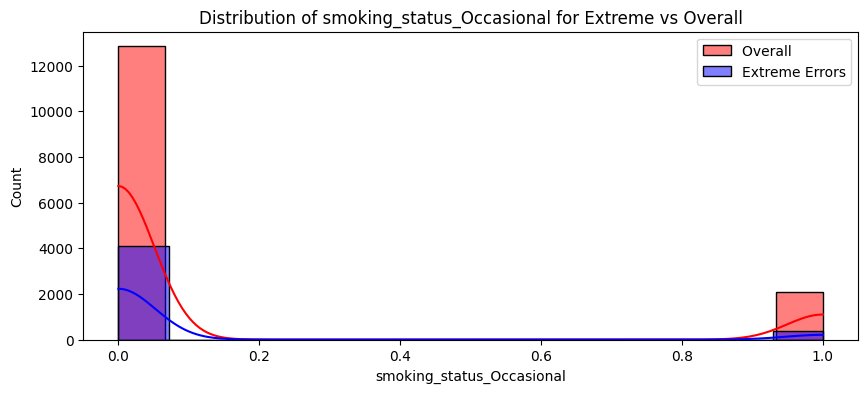

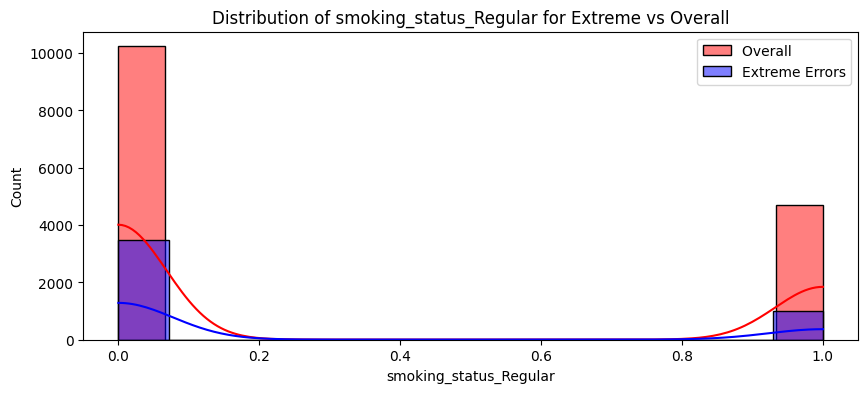

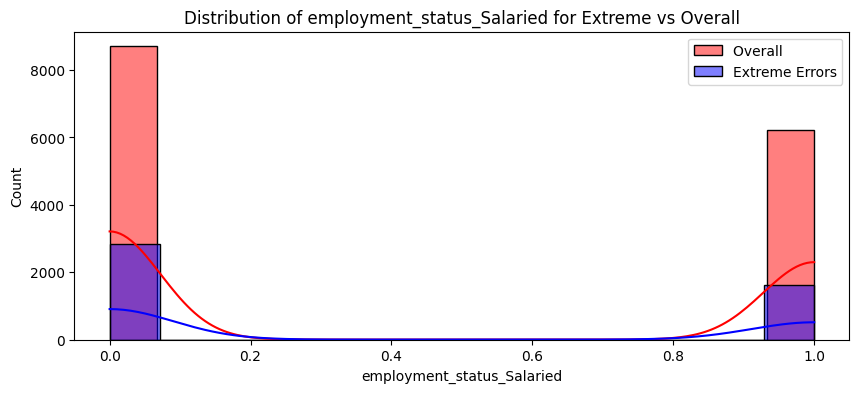

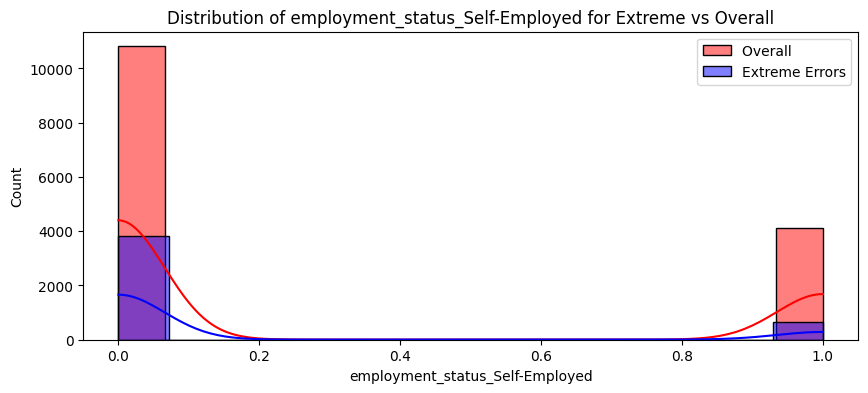

In [70]:
for feature in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(x_test[feature],label="Overall ",kde=True,color='red')
    sns.histplot(extreme_errors_df[feature],label="Extreme Errors",kde=True,color='blue')
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme vs Overall")
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

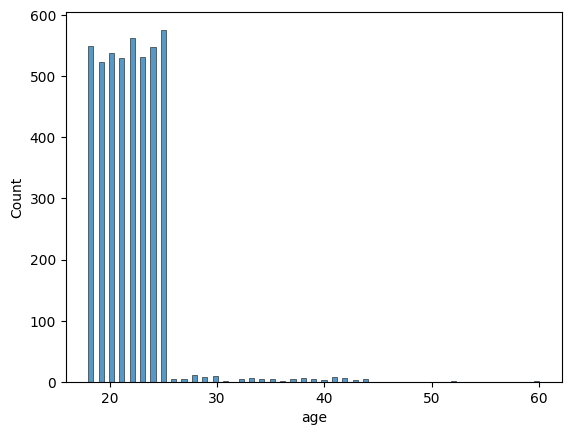

In [71]:
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
extreme_errors_df['income_level'] = -1
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_errors_df[col_to_scale])
sns.histplot(df_reversed['age'])